# Исследование инвестиционных тенденций в индийских стартапах

В распоряжении данные полученные с сайта kaggle.com — архив объемов финансирования индийских стартапов в период с 2000 по 2020 годы. Задачей проекта являлось отточить навыки первычного анализа базы данных, проведение работ с популярным сайтом и получение некоторой статистики для дальнейшего анализа целесообразности и популярных направлений для инвестирования в стартапы.

<p></p>

<div style="border:solid blue 2px; padding: 20px">

***Цель исследования:***

- Провести первичный анализ датасета (изучить наличие дубликатов и пустых значений, отформатировать тип данных для соответствующих столбцов);
- При наличии пустых значений определить формат заполнения (ср. значение, медиана);
- Изучить распределение образования стартапов в Индии по годам. Изучить тренды формирования новых организаций;
- Изучить распределение образования стартапов по годам и отраслям;
- Провести анализ по отраслям и количеству инвестиций. Определить наиболее популярные для инвестирования области;
- Провести анализ окупаемости стартапов по областям технологий. Вычислить сектор с наибольшей окупаемостью;
- Оценить влияние актуальных на момент создания стартапов индексов ESG и Growth Rate 
    

***Ход исследования:***

В файле "Indian_Startup_Investment_Trends.csv" содержится датасет значений различных характеристик стартапов с их данными о их развитии .

Для решения поставленных задач необходимо произвести первичный анализ качества данных и получить понимание об объеме данных:

Таким образом, исследование пройдёт в 5 этапов:

1. Обзор данных.
2. Предобработка данных.
3. Расчёты и добавление результатов в таблицу.
4. Исследовательский анализ данных.
5. Выводы


</div>

In [23]:
### Открываем файлы и изучаем общую информацию. 

In [24]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Открываем файл
df = pd.read_csv('Indian_Startup_Investment_Trends.csv')

In [26]:
# Проводим обзор первых строк
df.head()

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,NaN,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,NaN,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,NaN,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,NaN,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


#### Описание данных:
- 	***Startup_ID*** — уникальный Код стартапа 
- 	***Name*** — имя стартапа
- 	***Sector*** — техническая отрасль 
- 	***Sub-Sector*** — подсектор
- 	***City*** — город основания
- 	***State*** — штат/территория основания
- 	***Founded_Year*** — этаж
- 	***Founder_Name*** — имя основателя
- 	***Funding_Stage***— стадия финансирования (например, Seed, Series A, IPO и т.д.)
- 	***Investment_Type*** — тип инвестиций (например, Grant, Equity, Debt и т.д.)
- 	***Amount_Raised*** — сумма привлеченных средств
- 	***Investors_Count*** — количество инвесторов
- 	***Lead_Investor*** — ведущий инвестор
- 	***Co-Investors*** — соинвесторы
- 	***Valuation_Post_Funding*** — оценка стартапа после финансирования
- 	***Revenue*** — выручка стартапа
- 	***Profitability*** — прибыльность (Yes/No)
- 	***Number_of_Employees*** — количество сотрудников
- 	***Tech_Stack*** — используемые технологии (например, IoT, Blockchain, AI и т.д.)
- 	***Primary_Product*** — основной продукт
- 	***Customer_Base_Size***— размер клиентской базы
- 	***Growth_Rate***— темп роста
- 	***Exit_Status*** — статус выхода (Yes/No)
- 	***Acquisition_Details*** — детали приобретения (если есть)
- 	***Funding_Date*** — дата финансирования
- 	***Pitch_Deck_Link*** — ссылка на презентацию стартапа
- 	***Social_Media_Followers*** — количество подписчиков в социальных сетях
- 	***Competitors*** — конкуренты
- 	***Patents*** — количество патентов
- 	***ESG_Score*** — оценка ESG (Environmental, Social, Governance)
- 	***Diversity_Index*** — индекс разнообразия
- 	***Net_Impact_Score*** — общий показатель влияния


In [27]:
#Оценим длиниу датасета
len(df)

12428

In [28]:
#информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup_ID              12428 non-null  object 
 1   Name                    12428 non-null  object 
 2   Sector                  12428 non-null  object 
 3   Sub-Sector              12428 non-null  object 
 4   City                    12428 non-null  object 
 5   State                   12428 non-null  object 
 6   Founded_Year            12428 non-null  int64  
 7   Founder_Name            12428 non-null  object 
 8   Funding_Stage           12428 non-null  object 
 9   Investment_Type         12428 non-null  object 
 10  Amount_Raised           12428 non-null  int64  
 11  Investors_Count         12428 non-null  int64  
 12  Lead_Investor           12428 non-null  object 
 13  Co-Investors            12428 non-null  object 
 14  Valuation_Post_Funding  12428 non-null

In [29]:
#поиск дублирования
df = df.drop_duplicates()
df['Funding_Date'] = pd.to_datetime(df['Funding_Date'])

dupl = df.duplicated(subset=['Name', 'Pitch_Deck_Link']).value_counts()
df_cleaned = df.drop_duplicates(subset=['Name', 'Pitch_Deck_Link'], keep=False)

In [30]:
#поиск пропущенных значений
missing_values = df.isna().sum()
df_filled = df.fillna({'Acquisition_Details ': 'Unspecified'})

In [31]:
# оценка min, max, среднее
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Founded_Year,12428.0,2011.548198,2000.0,2006.0,2012.0,2018.0,2023.0,6.874311
Amount_Raised,12428.0,5022741.411168,100101.0,2550872.0,5031528.5,7511475.5,9998407.0,2859507.705152
Investors_Count,12428.0,5.497103,1.0,3.0,6.0,8.0,10.0,2.858551
Valuation_Post_Funding,12428.0,50378580.716447,1018160.0,25274100.75,50486107.0,75189468.0,99991036.0,28543353.768734
Revenue,12428.0,2530078.304393,100013.0,1306538.25,2517865.0,3737343.25,4999381.0,1409488.269594
Number_of_Employees,12428.0,256.460573,10.0,135.0,256.0,377.0,500.0,140.630112
Customer_Base_Size,12428.0,50464.855246,1004.0,25544.0,50305.5,75052.75,99994.0,28616.708025
Growth_Rate,12428.0,27.433665,5.0,16.36,27.355,38.44,50.0,12.898016
Funding_Date,12428,2019-07-11 10:01:35.011264768,2015-01-01 00:00:00,2017-04-06 00:00:00,2019-07-15 00:00:00,2021-10-04 06:00:00,2023-12-28 00:00:00,NaN
Social_Media_Followers,12428.0,50642.604361,1008.0,25872.75,50435.0,75531.75,99963.0,28518.034869


***Вывод на основе описательных данных:***

1. ***Investors_Count:*** среднее число инвесторов в каждый стартап составляет - 6

2. ***Number_of_Employees:*** минимальное число сотрудников 10. Среднее количество - 256

3. ***Growth_Rate:*** минимальный индекс - 5%, максимальный - 50%. Среднее значение - 27,4%, что говорит о показательности таблицы и целесообразности исследования.

4. ***Net_Impact_Score:***  минимальный индекс - 1%, максимальный - 10%. Среднее значение - 25,9%, что также говорит о показательности таблицы и целесообразности исследования.
5. Также первичный анализ позволяет увидеть отсутствие пустых значений и неприемлемых дубликатов, что исключает необходимость дополнительной проверки и дозаполнения данными.

<p></p>

<div style="border:solid green 1px; padding: 20px">

***Анализ распределения открытия новых компаний (стартапов) в Индии по годам***

- Позволяет оценить вовлеченность населения в бизнес по годам
- Анализ помогает понять тренды на открытие стартапов  

</div>

In [32]:
#Добавление на график линий тренда (линейной и биномиальной) для возможности анализа
startups_per_year = df['Founded_Year'].value_counts().sort_index()
lineal = np.polyfit(startups_per_year .index, startups_per_year .values, 1) #Линейная линия тренда
nomial = np.polyfit(startups_per_year .index, startups_per_year .values, 2) #Биномиальная линия тренда
plineal = np.poly1d(lineal)
pnomial = np.poly1d(nomial)

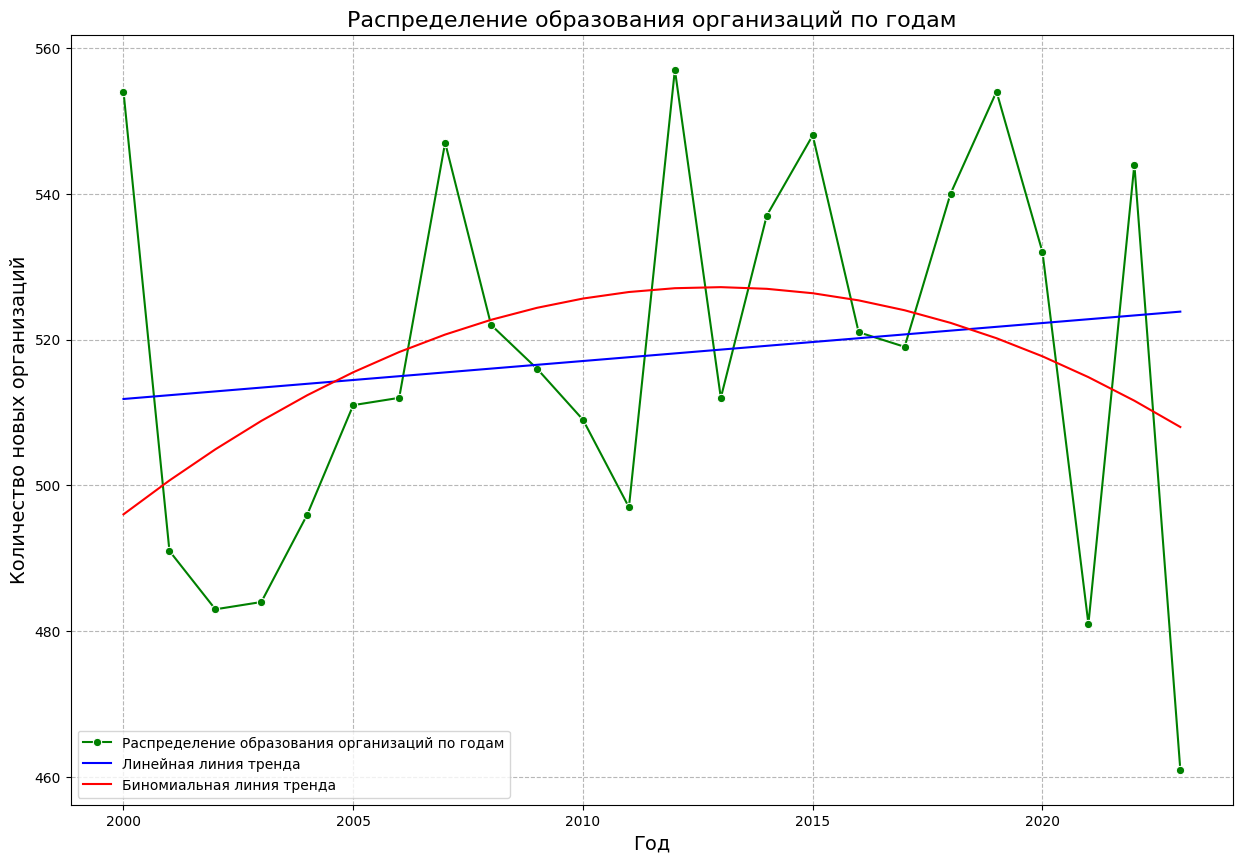

In [33]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=startups_per_year .index, y=startups_per_year .values, marker='o', color='green', label='Распределение образования организаций по годам')
plt.plot(startups_per_year .index, plineal(startups_per_year .index), "b-",label='Линейная линия тренда')
plt.plot(startups_per_year .index, pnomial(startups_per_year .index), "r-", label='Биномиальная линия тренда')
plt.title('Распределение образования организаций по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество новых организаций', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.9,  which='both')
plt.legend()
plt.show()

#### ***Вывод:***
1. Прочитали датасет
2. Данные читаемы и пригодны для полноценного анализа, в том числе построения графиков.
3. Линейная линия тренда: Показывает общую тенденцию изменения количества новых организаций за указанный период. Линия идет вверх, это указывает на рост числа организаций
4. Биномиальная линия тренда: Эта линия учитывает возможные колебания и изгибы в данных, позволяет выявить периоды ускоренного роста или спада. Видны колебания в период с 2005 по 2017, что говорит о высокой популярности стартапов.

<p></p>

<div style="border:solid green 1px; padding: 20px">

***Анализ популярности секторов новых компаний (стартапов) в Индии по годам***

- Позволяет оценить перспективные технические отрасли для создания организаций и инвестирования
- Помогает отследить тренды по секторам в зависимости от лет
- Помогает оценить влияние внешних фаторов, соответствующих годам, на открытие бизнеса согласно направленности.

</div>

Для начала были отобраны самые популярные секторы по годам

In [34]:
most_popular_sector_per_year = df.groupby(['Founded_Year', 'Sector']).size().reset_index(name='Count')
grouped = df.groupby(['Founded_Year', 'Sector']).size().reset_index(name='Count')
max_counts = grouped.groupby('Founded_Year')['Count'].transform(max)
most_popular_all = grouped[grouped['Count'] == max_counts]
print(most_popular_sector_per_year)

     Founded_Year      Sector  Count
0            2000    AgriTech     60
1            2000      EdTech     87
2            2000     FinTech    104
3            2000    FoodTech     65
4            2000  HealthTech     80
..            ...         ...    ...
163          2023     FinTech     62
164          2023    FoodTech     55
165          2023  HealthTech     70
166          2023      Retail     54
167          2023  TravelTech     75

[168 rows x 3 columns]


C:\Users\VolRim\AppData\Local\Temp\ipykernel_2116\4167033001.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_counts = grouped.groupby('Founded_Year')['Count'].transform(max)


Для нагядности создана тепловая и столбчатая диаграмма

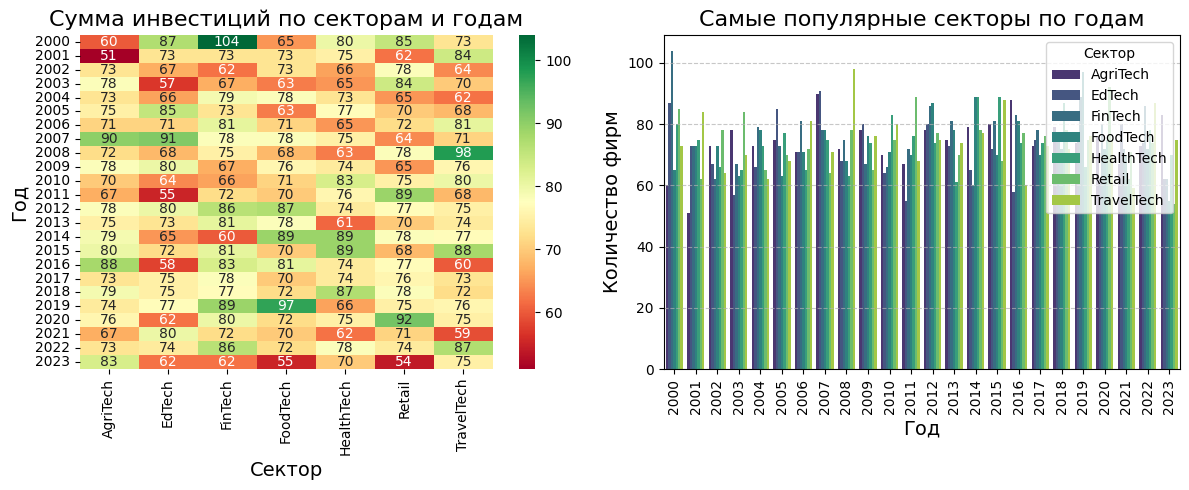

In [35]:
# Тепловая диаграмма
fig, axis = plt.subplots(1, 2, figsize=(12, 5))
pivot_table = most_popular_sector_per_year.pivot(index='Founded_Year', columns='Sector', values='Count')
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', fmt='.0f', ax=axis[0])
axis[0].set_title('Сумма инвестиций по секторам и годам', fontsize=16)
axis[0].set_xlabel('Сектор', fontsize=14)
axis[0].set_ylabel('Год', fontsize=14)

# Столбчатая диаграмма
sns.barplot(x='Founded_Year', y='Count', hue='Sector', data=most_popular_sector_per_year, palette='viridis', ax=axis[1])
axis[1].set_title('Самые популярные секторы по годам', fontsize=16)
axis[1].set_xlabel('Год', fontsize=14)
axis[1].set_ylabel('Количество фирм', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.legend(title='Сектор')
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

#### ***Вывод:***
1. Полученные данные позволяют понять о преобладающей популярности сектора Fintech
2. По графикам видно движение тренда на различные отрасли, вызванные различными экономико-политическими обстоятельствами в Индии
3. Благодаря тепловой диаграмме заметно отсутствие тренда создания стартапов в 2002 и в 2023 годах. Несмотря на вышесказанное наиболее популярными в эти годы стали Retail и Agritech, что говорит о влиянии внешних факторов на популярность направлений бизнеса.

<p></p>

<div style="border:solid green 1px; padding: 20px">

***Анализ новых компаний (стартапов) в Индии по объему инвестиций и секторам***
Предназначен для следующего: 
- Определение самых привлекательных секторов для инвестиций
- Сравнение секторов по объему привлеченных инвестиций
- Анализ средних инвестиций в секторах
- Идентификация уникальных секторов
- Принятие решений для стартапов
</div>

Подготовка данных для анализа. Группировка по секторам и объему инвестциий

In [36]:
top_sectors = df.groupby('Sector')['Amount_Raised'].sum().nlargest(10)
amounts = df.groupby('Sector')['Amount_Raised'].sum()
sectors = df['Sector'].unique()
mean_amounts = df.groupby('Sector')['Amount_Raised'].mean().nlargest(10)

Построение графиков для анализа

C:\Users\VolRim\AppData\Local\Temp\ipykernel_2116\1875280487.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis2[1].set_yticklabels([f'{int(y/1e9)}' for y in axis2[1].get_yticks()])
C:\Users\VolRim\AppData\Local\Temp\ipykernel_2116\1875280487.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis2[1].set_xticklabels(axis2[1].get_xticklabels(), rotation=90)
C:\Users\VolRim\AppData\Local\Temp\ipykernel_2116\1875280487.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis2[0].set_yticklabels([f'{int(y/1e3)}' for y in axis2[0].get_yticks()])
C:\Users\VolRim\AppData\Local\Temp\ipykernel_2116\1875280487.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

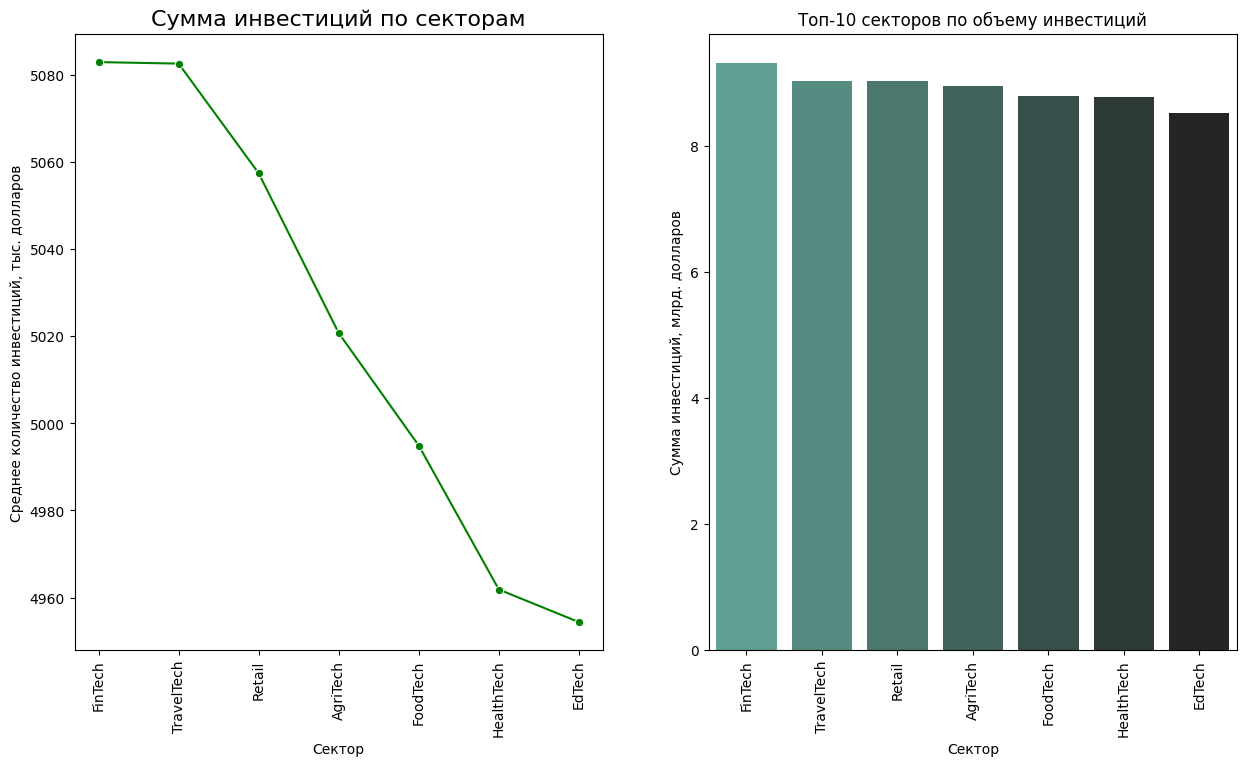

In [37]:
fig, axis2 = plt.subplots(1, 2, figsize=(15, 8))
sns.color_palette("dark:#5A9_r", as_cmap=True)
sns.barplot( x=top_sectors.index,y=top_sectors.values, palette="dark:#5A9_r", hue=top_sectors.index, ax=axis2[1])

plt.ticklabel_format(axis='y', style='plain')
axis2[1].set_yticklabels([f'{int(y/1e9)}' for y in axis2[1].get_yticks()])

axis2[1].set_title('Топ-10 секторов по объему инвестиций')
axis2[1].set_ylabel('Сумма инвестиций, млрд. долларов', fontsize=10)
axis2[1].set_xlabel('Сектор', fontsize=10)
axis2[1].set_xticklabels(axis2[1].get_xticklabels(), rotation=90)

sns.lineplot(x=top_sectors.index, y=mean_amounts, marker='o', color='green', ax=axis2[0])
axis2[0].set_title('Сумма инвестиций по секторам', fontsize=16)
axis2[0].set_xlabel('Сектор', fontsize=10)
axis2[0].set_ylabel('Среднее количество инвестиций, тыс. долларов', fontsize=10)
axis2[0].set_yticklabels([f'{int(y/1e3)}' for y in axis2[0].get_yticks()])
axis2[0].set_xticklabels(axis2[0].get_xticklabels(), rotation=90)
plt.show()

#### ***Вывод:***
1. Полученные данные позводяют понять о преобладающей популярности сектора Fintech, что подтверждает результаты проведенного ранее исследования
2. По графикам видно приблизительно равные объемы инвестиций по секторам стартапов в Индии. Разница между минимальным и максимальным значением составила 120 тыс. долларов
3. На столбчатой диаграмме справа приведены самые популярные сектора для инвестирования. 

<p></p>

<div style="border:solid green 1px; padding: 20px">

***Анализ рентабильности индийских стартапов по секторам***
Предназначен для следующего: 
- Определение окупаемости по секторам
- Сравнение секторов по актуальности и целесообразности инвестирования
- Анализ средних инвестиций в секторах
- Принятие решений для инвесторов
</div>

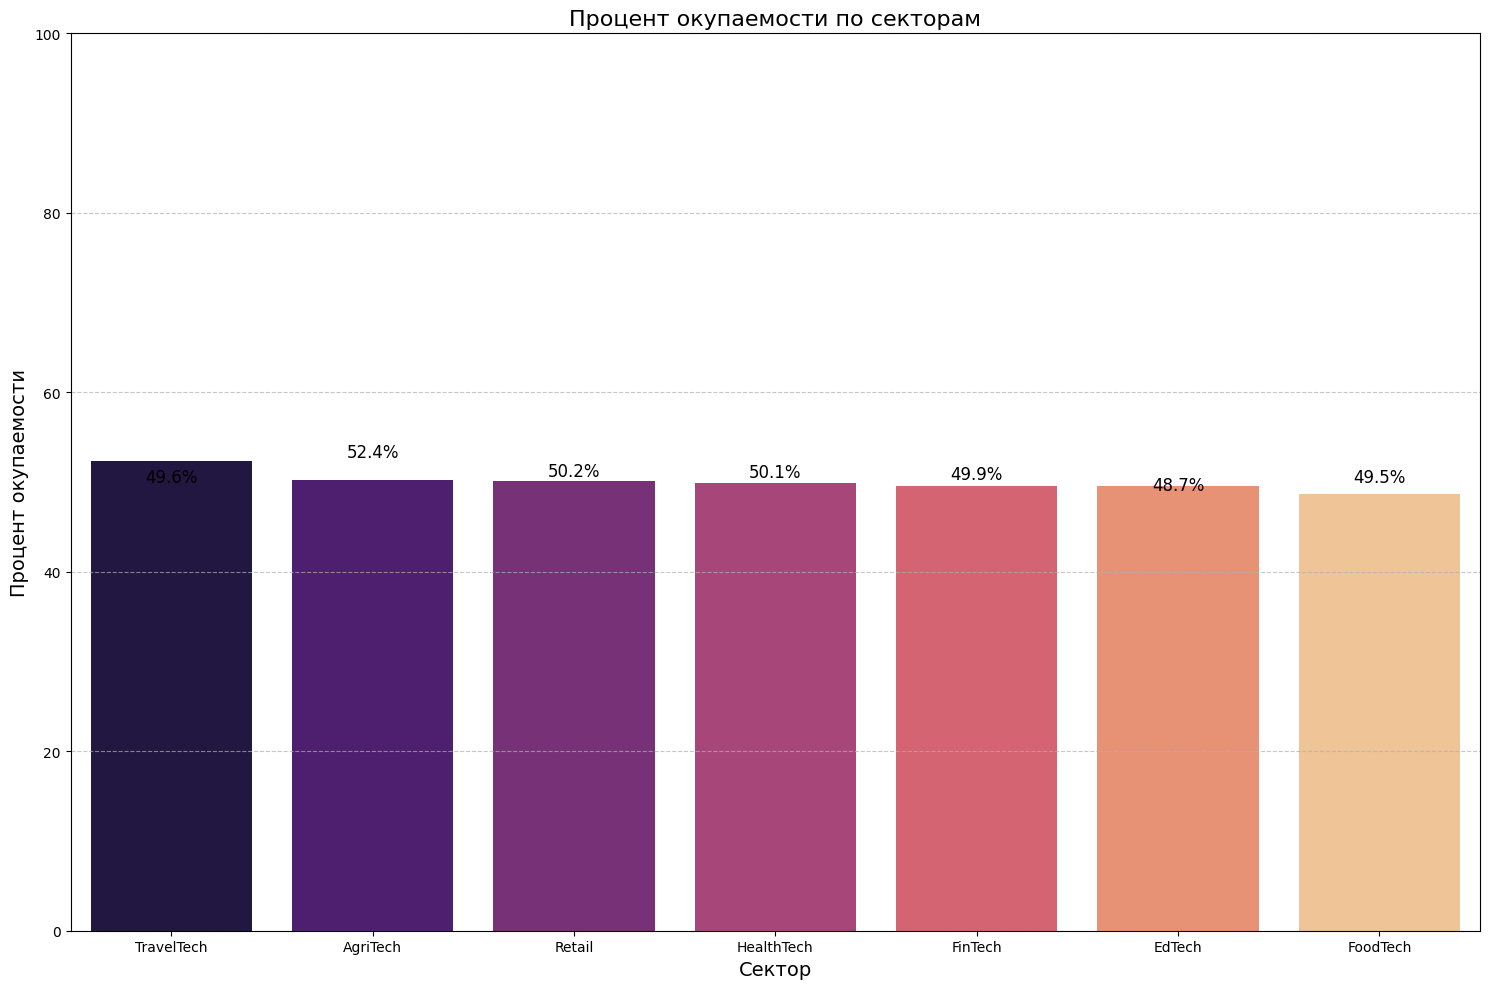

In [38]:
#Анализ рентабильности по секторам
total_firms = df['Sector'].value_counts().reset_index()
total_firms.columns = ['Sector', 'Total Firms']
profitable_firms = df[df['Profitability'] == 'Yes']['Sector'].value_counts().reset_index()
profitable_firms.columns = ['Sector', 'Profitable Firms']
profitability_df = pd.merge(total_firms, profitable_firms, on='Sector')
profitability_df['Profitability Percentage'] = (profitability_df['Profitable Firms'] / profitability_df['Total Firms']) * 100
profitability_df = profitability_df.sort_values(by='Profitability Percentage', ascending=False)

# Визуализация
plt.figure(figsize=(15, 10))
sns.barplot(
    x='Sector', 
    y='Profitability Percentage', 
    hue='Sector',  
    data=profitability_df, 
    palette='magma', 
    legend=False  
)
for index, row in profitability_df.iterrows():
    plt.text(index, row['Profitability Percentage'], f'{row["Profitability Percentage"]:.1f}%',
             ha='center', va='bottom', fontsize=12)
plt.title('Процент окупаемости по секторам', fontsize=16)
plt.xlabel('Сектор', fontsize=14)
plt.ylabel('Процент окупаемости', fontsize=14)
plt.ylim(0, 100)  # Ограничиваем ось Y до 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
#### ***Вывод:***
1. Полученные данные позводяют понять о преобладающей окупаемости сектора Traveltech, что подтверждает результаты проведенного ранее исследования и соответствует экономической обстановке страны.
2. По графикам видно приблизительно равные индексы окупаемости по секторам стартапов в Индии. 
3. На столбчатой диаграмме справа приведены самые популярные сектора по окупаемости. 

SyntaxError: invalid syntax (1075567172.py, line 2)

<p></p>

<div style="border:solid green 1px; padding: 20px">

***Анализ индийских стартапов учитывая индексы ESG (Environmental, Social, Governance) и Growth Rate (темпы роста) в зависимости от года создания***
Предназначен для следующего: 
Оценить динамику ESG и Growth Rate по годам.
- Выявить годы с аномальными значениями.
- Определить влияние ESG на Growth Rate.
- Принять обоснованные бизнес-решения на основе данных.
</div>

In [ ]:

esg_by_sector = df.groupby(['Founded_Year'])['ESG_Score'].mean().reset_index()
esg_per_year = esg_by_sector.sort_values(by='Founded_Year')
coefficients0 = np.polyfit(esg_per_year['Founded_Year'], esg_per_year['ESG_Score'], 2)  # 2 — степень полинома
trend_line0 = np.polyval(coefficients0, esg_per_year['Founded_Year'])
fig, axis3 = plt.subplots(1, 2, figsize=(15, 8))

# Линейный график для каждого сектора
sns.lineplot(x='Founded_Year', y='ESG_Score', data=esg_per_year, marker='o', markersize=10, linewidth=2, ax=axis3[0])
for _, row in esg_per_year.iterrows():
    axis3[0].text(row['Founded_Year'], row['ESG_Score'], f'{row["ESG_Score"]:.1f}',
             ha='center', va='bottom', fontsize=10)

# Настройка графика
axis3[0].set_title('Средний индекс ESG по годам для каждого сектора', fontsize=12)
axis3[0].set_xlabel('Год', fontsize=14)
axis3[0].set_ylabel('Средний индекс ESG', fontsize=14)
axis3[0].grid(True, linestyle='--', alpha=0.7, color='gray')
axis3[0].plot(esg_per_year['Founded_Year'], trend_line0, color='red', label='Биномиальная линия тренда')
#plt.legend(title='Сектор')

growth_by_sector = df.groupby(['Founded_Year'])['Growth_Rate'].mean().reset_index()
growth_per_year = growth_by_sector.sort_values(by='Founded_Year')
coefficients = np.polyfit(growth_per_year['Founded_Year'], growth_per_year['Growth_Rate'], 2)  # 2 — степень полинома
trend_line = np.polyval(coefficients, growth_per_year['Founded_Year'])

# Линейный график для каждого сектора
sns.lineplot(x='Founded_Year', y='Growth_Rate', data=growth_per_year, marker='o', markersize=10, linewidth=2, ax=axis3[1], color='green')
for _, row in growth_per_year.iterrows():
    axis3[1].text(row['Founded_Year'], row['Growth_Rate'], f'{row["Growth_Rate"]:.1f}',
             ha='center', va='bottom', fontsize=10)
axis3[1].set_title('Средний индекс Growth Rate по годам для каждого сектора', fontsize=12)
axis3[1].set_xlabel('Год', fontsize=14)
axis3[1].set_ylabel('Средний индекс Роста', fontsize=14)
axis3[1].grid(True, linestyle='--', alpha=0.7, color='gray')
axis3[1].plot(growth_per_year['Founded_Year'], trend_line, color='red', label='Биномиальная линия тренда')
# Отображение графика
plt.tight_layout()
plt.show()

In [ ]:
#### ***Вывод:***
1. Полученные данные позволяют понять об отсутствии видимой зависимости и тренда на увеличение индекса ESG
2. Данные между средним индексом ESG и Growth Rate коррелируют, большинство пиков инжексов по годам совпадают
2. Индекс ESG преобладает в период с 2005 по 2022, что говорит о пиковом тренде в определенные года 
3. Максимальный пик Growth Rate выпадает на 2018 год, что говорит о положительных социально-экономических тенденциях страны в этот год.

<p></p>

<div style="border:solid blue 1px; padding: 20px">

***На основании проведенного анализа данных о стартапах в Индии можно сделать следующие ключевые выводы:***

1. Динамика создания стартапов:
- Наблюдается рост числа новых организаций за исследуемый период, что подтверждается линейной линией тренда.
- Биномиальная линия тренда выявила периоды колебаний, особенно в промежутке с 2005 по 2017 годы, что свидетельствует о высокой популярности стартапов в эти годы. Это может быть связано с экономическими, технологическими или политическими изменениями в стране.
2. Популярность секторов:
- Fintech является наиболее популярным сектором, что подтверждается как количеством стартапов, так и объемом инвестиций. Это связано с развитием финансовых технологий и цифровизацией экономики.
- Другие сектора, такие как Retail и Agritech, также демонстрируют значительную активность, особенно в периоды, когда Fintech не доминировал (например, в 2002 и 2023 годах). Это указывает на влияние внешних факторов, таких как изменения в потребительском поведении или государственной политике.
3. Инвестиции в стартапы:
- Объемы инвестиций распределены между секторами относительно равномерно, с разницей между минимальным и максимальным значением всего в 120 тыс. долларов. Это говорит о диверсификации инвестиций и интересе инвесторов к различным отраслям.
- Наиболее привлекательными для инвестиций секторами, помимо Fintech, являются Traveltech, Edtech и Healthtech.
4. Окупаемость стартапов:
- Сектор Traveltech демонстрирует наивысшую окупаемость, что связано с ростом туризма и мобильности в Индии.
- В целом, окупаемость по секторам остается на приблизительно одинаковом уровне, что указывает на сбалансированность рынка стартапов.
5. Индексы ESG и Growth Rate:
- Индекс ESG не демонстрирует четкого тренда на увеличение, что может свидетельствовать о недостаточном внимании к экологическим, социальным и управленческим аспектам в некоторых секторах.
- Индекс Growth Rate коррелирует с индексом ESG, что указывает на возможную связь между устойчивым развитием и темпами роста компаний.
- Пик Growth Rate в 2018 году свидетельствует о благоприятной социально-экономической обстановке в стране в этот период.

Рекомендации:
1. Для инвесторов:
Сосредоточиться на секторах Fintech, Traveltech и Edtech, так как они демонстрируют высокую окупаемость и привлекательность для инвестиций.
Учитывать ESG-факторы при выборе стартапов, так как они могут положительно влиять на темпы роста.

2. Для стартапов:
Уделять больше внимания ESG-принципам, чтобы повысить привлекательность для инвесторов и устойчивость бизнеса.
Анализировать внешние факторы (экономические, политические, технологические) для выбора оптимального времени выхода на рынок.

3. Для государства:
Поддерживать сектора с высоким потенциалом роста, такие как Fintech и Agritech, через льготы и инвестиции.
Стимулировать развитие ESG-инициатив для повышения устойчивости бизнеса.
</div>

***Итог проведенного исследования***
Проведенный анализ позволяет сделать вывод о динамичном развитии стартапов в Индии, с преобладанием сектора Fintech и высокой окупаемостью в Traveltech. Рекомендации, основанные на данных, помогут инвесторам, предпринимателям и государству принимать обоснованные решения для дальнейшего роста и устойчивости рынка стартапов.